用いたデータ：統計科学研究所 成績csv\
https://statistics.co.jp/reference/statistical_data/statistical_data.htm

### 目次
1, データの読み込み + 要約統計量の確認\
2, Kmeansでクラスタリング\
3, アンダーサンプリングが必要かどうか確認\
4, ロジスティック回帰の実装\
5, 精度評価\
6, まとめ

### まとめ
・特徴量係数の大きさとした\
・決定木の特徴量とおおよそ一致していた(順番は違ったが、、)\
・係数の値を見ることで,1に影響を与えているのか0に影響を与えているのかが把握できる。(決定木ではできない)

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
seiseki = pd.read_csv("seiseki.csv")

### 要約統計量の確認

In [53]:
seiseki.describe()

,kokugo,shakai,sugaku,rika,ongaku,bijutu,taiiku,gika,eigo
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,52.331325,39.602410,45.614458,49.885542,42.331325,62.457831,57.740964,47.307229,39.084337
std,21.835858,21.456335,24.236127,21.408130,22.894855,17.188298,26.577943,22.519397,29.507351
min,0.000000,4.000000,0.000000,9.000000,2.000000,15.000000,2.000000,2.000000,0.000000
25%,35.000000,23.000000,28.000000,31.000000,25.250000,52.000000,35.250000,31.250000,12.000000
50%,53.000000,35.000000,43.000000,49.000000,41.500000,65.000000,60.000000,48.500000,35.000000
75%,70.000000,53.750000,63.750000,65.750000,58.750000,75.750000,82.000000,65.000000,66.750000
max,96.000000,90.000000,100.000000,100.000000,96.000000,99.000000,99.000000,100.000000,99.000000


### k-meansでクラスタリング
分類問題を扱いため、k-meansでクラスタリングする

In [40]:
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(seiseki)
cluster = kmeans.predict(seiseki)
seiseki_cluster = seiseki.copy()
seiseki_cluster["cluster"] = cluster
seiseki_cluster

,kokugo,shakai,sugaku,rika,ongaku,bijutu,taiiku,gika,eigo,cluster
0,30,43,51,63,60,66,37,44,20,1
1,39,21,49,56,70,72,56,63,16,1
2,29,30,23,57,69,76,33,54,6,1
3,95,87,77,100,77,82,78,96,87,0
4,70,71,78,67,72,82,46,63,44,0
...,...,...,...,...,...,...,...,...,...,...
161,82,78,80,88,80,69,83,78,90,0
162,0,8,2,9,5,18,42,2,1,1
163,45,26,29,24,31,57,68,40,27,1
164,73,31,43,32,59,64,82,48,56,0


In [41]:
x = seiseki
t = seiseki_cluster["cluster"]
x_train,x_test,t_train,t_test = train_test_split(x,t,
                                                 test_size=0.3,
                                                 random_state=0)

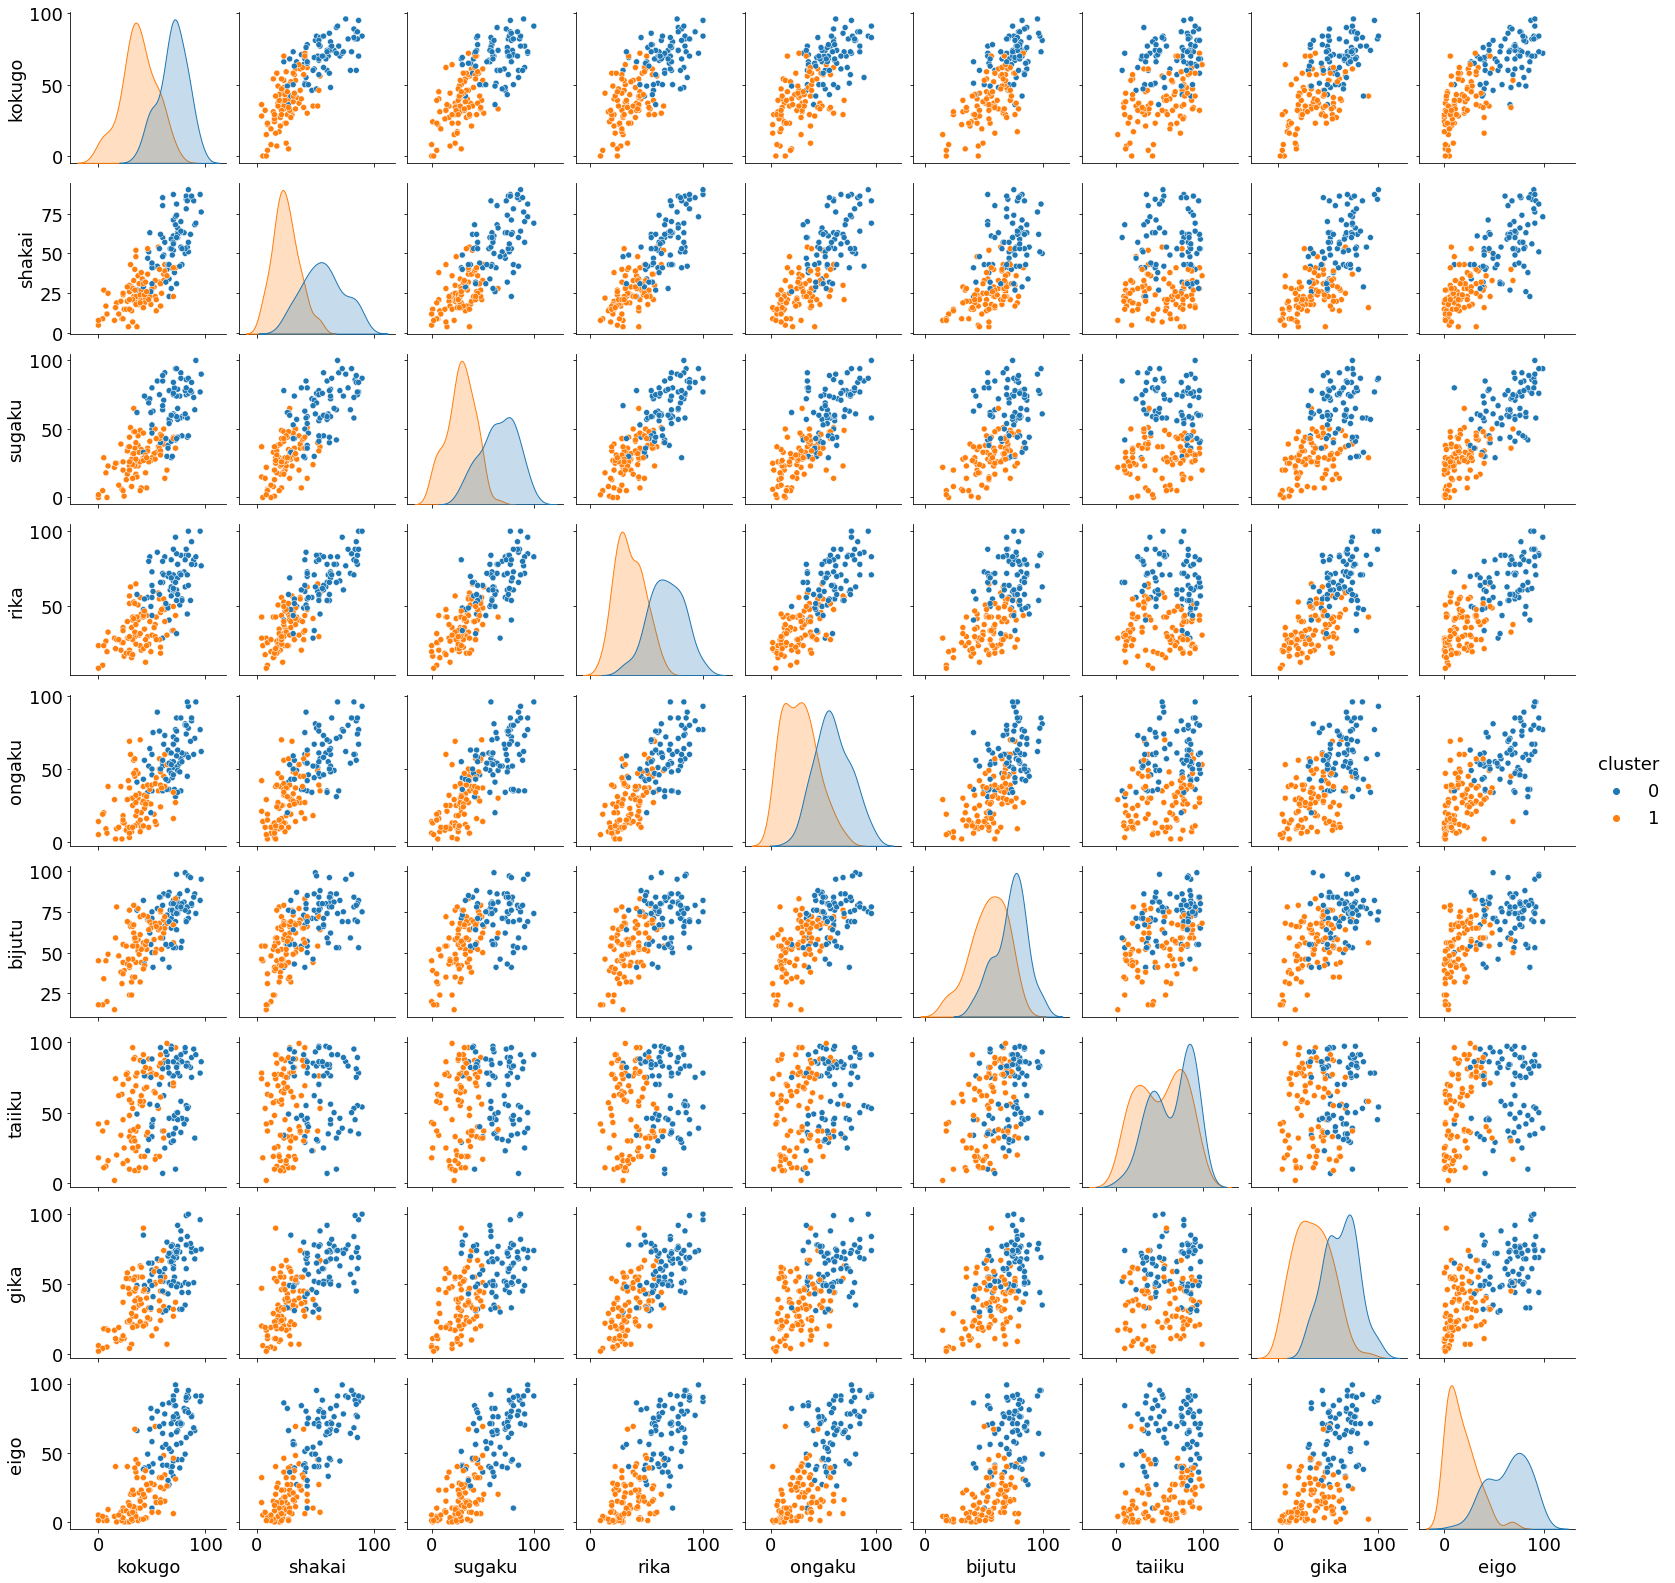

In [42]:
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 18
sns.pairplot(seiseki_cluster,hue="cluster")
plt.show()

### それぞれのクラスターの数を確認
0のクラスターは166人\
1のクラスターは166人\
で同じ人数なので、アンダーサンプリングする必要なし

In [52]:
seiseki_cluster["cluster"]==0
#seiseki_cluster["cluster"]==1

0      False
1      False
2      False
3       True
4       True
       ...  
161     True
162    False
163    False
164     True
165     True
Name: cluster, Length: 166, dtype: bool

### ロジスティック回帰の定義 & 実装

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, t_train)

LogisticRegression()

### ロジスティック回帰で予測する。

In [44]:
### クラスター番号(0 or 1 or 2)の予測
t_pred = lr.predict(x_test)

### それぞれのクラスターに属する確率を予測
probs = lr.predict_proba(x_test)


print("t_pred：",t_pred)
print("--------------------------------------")
print("probs：",probs)

t_pred： [1 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0
 1 1 1 1 1 1 0 1 1 1 0 0 1]
--------------------------------------
probs： [[6.92779167e-14 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [9.99993755e-01 6.24523170e-06]
 [1.10100817e-11 1.00000000e+00]
 [2.56345611e-10 1.00000000e+00]
 [7.95363775e-13 1.00000000e+00]
 [3.16611533e-05 9.99968339e-01]
 [9.99999999e-01 6.43442577e-10]
 [1.00000000e+00 1.78544703e-11]
 [1.00000000e+00 4.41587103e-14]
 [1.00000000e+00 1.44465671e-16]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 3.13218851e-24]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 7.73178218e-21]
 [7.30578709e-10 9.99999999e-01]
 [1.00000000e+00 1.09916692e-16]
 [9.14111406e-02 9.08588859e-01]
 [3.10056225e-06 9.99996899e-01]
 [9.45965627e-01 5.40343732e-02]
 [4.98046049e-13 1.00000000e+00]
 [9.69228287e-09 9.99999990e-01]
 [2.22282193e-11 1.00000000e+00]
 [9.99999955e-01 4.46562525e-08]
 [9.99821388e-01 1.78612498e-04]
 [0.00000000e+00 1

### 精度評価
1, 正解率\
2, 混合行列(confusion matrix)\
3, 適合率(precision)\
4, 再現率(recall)

In [45]:
### 必要なライブラリ,メソッドをインポートする
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [46]:
### 1,正解率
print('accuracy = ',
      accuracy_score(t_test, t_pred))
### 2,混合行列
print('confusion matrix = \n',
      confusion_matrix(t_test,t_pred))

### 3,適合率
print('precision = ',
      precision_score(t_test, t_pred))

### 4,再現率
print('recall = ', recall_score(t_test, t_pred))

accuracy =  0.98
confusion matrix = 
 [[20  1]
 [ 0 29]]
precision =  0.9666666666666667
recall =  1.0


### ロジスティック回帰の係数と切片を確認する。

In [47]:
print("係数：\n",lr.coef_)
lr.coef_.shape

係数：
 [[-0.20653459 -0.20516606 -0.43616399 -0.24323842 -0.20095938 -0.19422305
  -0.10229375 -0.23468671 -0.35225279]]


(1, 9)

In [48]:
print("切片：\n",lr.intercept_)

切片：
 [106.56962916]


In [69]:
lr.coef_[0,1]

-0.20516606391297598

### 係数と科目名を紐付けする

In [108]:
for i in range(len(lr.coef_[0])):
    print("科目名：",seiseki.columns[i],"係数：",lr.coef_[0,i])

科目名： kokugo 係数： -0.20653459140716288
科目名： shakai 係数： -0.20516606391297598
科目名： sugaku 係数： -0.43616399313393983
科目名： rika 係数： -0.2432384154504739
科目名： ongaku 係数： -0.2009593793066475
科目名： bijutu 係数： -0.19422305354177558
科目名： taiiku 係数： -0.10229375232559133
科目名： gika 係数： -0.23468671382648118
科目名： eigo 係数： -0.3522527884545389


### まとめ
・特徴量係数の大きさとした\
・決定木の特徴量とおおよそ一致していた(順番は違ったが、、)\
・係数の値を見ることで,1に影響を与えているのか0に影響を与えているのかが把握できる。(決定木ではできない)